<h1 align="center">Volume 3: Web Crawling</h1>
    <Name>
    <Class>
    <Date>

In [2]:
import re
import time
import requests
from bs4 import BeautifulSoup
import numpy as np
from selenium import webdriver
from urllib import robotparser
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import NoSuchElementException

from matplotlib import pyplot as plt, rcParams
%matplotlib inline
# rcParams["figure.figsize"] = (16,12)    # Use this line to increase your figure size (optional).

## Problem 1

Write a program that accepts a web address defaulting to the http://example.webscraping.com and a list of pages defaulting to ["/", "/trap", "/places/default/search"].
For each page, check if the website's robots.txt file permits access.
Return a list of boolean values corresponding to each page, and the crawl delay time.


In [6]:
#Problem 1
def prob1(url='http://example.webscraping.com', 
          pages=["/", "/trap", "/places/default/search"]):
    """Using urllib.robotparser, check if the provided webpages are allowed
    based on the website's robots.txt file.
    Parameters:
        url (str): The website's base url
        pages (list): List of strings of webpages to check
    Returns:
        """
    # Get robot file parser ready, find crawl delay
    rp = robotparser.RobotFileParser()
    rp.set_url(url + "/robots.txt")
    rp.read()
    crawl_delay = rp.crawl_delay("*")

    # Check access for each of the extensions
    access = []
    for ext in pages:
        access.append(rp.can_fetch("*", url + ext))

    return access, crawl_delay

prob1()

([True, True, True], None)

## Problem 2

Modify `scrape_books()` so that it gathers the price for each fiction book and returns the mean price in pounds for fiction books instead of the titles.

In [8]:
#Problem 2
def scrape_books(start_page = "index.html"):
    """ Crawl through http://books.toscrape.com and extract fiction data"""
    
        # Initialize variables, including a regex for finding the 'next' link.
    base_url="http://books.toscrape.com/catalogue/category/books/mystery_3/"
    titles = []
    prices = []
    page = base_url + start_page # Complete page URL.
    next_page_finder = re.compile(r"next") # We need this button.

    current = None

    for _ in range(4):
        while current == None: # Try downloading until it works.
            # Download the page source and PAUSE before continuing.
            page_source = requests.get(page).text
            time.sleep(1) # PAUSE before continuing.
            soup = BeautifulSoup(page_source, "html.parser")
            current = soup.find_all(class_="product_pod")

            # Navigate to the correct tag and extract title
            for book in current:
                titles.append(book.h3.a["title"])
                price = book.find(class_="price_color")
                prices.append(float(price.text.strip("Â£")))

            # Find the URL for the page with the next data.
            if "page-4" not in page:
                if soup.find(string=next_page_finder) is not None:
                    new_page = soup.find(string=next_page_finder).parent["href"]
                    page = base_url + new_page # New complete page URL.
                    current = None
    return titles, np.mean(prices)
scrape_books()

(['Sharp Objects',
  'In a Dark, Dark Wood',
  'The Past Never Ends',
  'A Murder in Time',
  'The Murder of Roger Ackroyd (Hercule Poirot #4)',
  'The Last Mile (Amos Decker #2)',
  'That Darkness (Gardiner and Renner #1)',
  'Tastes Like Fear (DI Marnie Rome #3)',
  'A Time of Torment (Charlie Parker #14)',
  'A Study in Scarlet (Sherlock Holmes #1)',
  'Poisonous (Max Revere Novels #3)',
  'Murder at the 42nd Street Library (Raymond Ambler #1)',
  'Most Wanted',
  'Hide Away (Eve Duncan #20)',
  'Boar Island (Anna Pigeon #19)',
  'The Widow',
  'Playing with Fire',
  'What Happened on Beale Street (Secrets of the South Mysteries #2)',
  "The Bachelor Girl's Guide to Murder (Herringford and Watts Mysteries #1)",
  'Delivering the Truth (Quaker Midwife Mystery #1)',
  'The Mysterious Affair at Styles (Hercule Poirot #1)',
  'In the Woods (Dublin Murder Squad #1)',
  'The Silkworm (Cormoran Strike #2)',
  'The Exiled',
  "The Cuckoo's Calling (Cormoran Strike #1)",
  'Extreme Prey (Luc

## Problem 3

The website IMDB contains a variety of information on movies.
Specifically, information on the top 10 box office movies of the week can be found at https://www.imdb.com/chart/boxoffice.
Using BeaufiulSoup, Selenium, or both, return a  list of the top 10 movies of the week and order the list according to the total grossing of the movies, from most money to the least.

In [10]:
# Problem 3
def scrape_imdb():
    # browser = webdriver.Chrome(ChromeDriverManager().install())
    # browser.get("https://www.imdb.com/chart/boxoffice")
    # # soup = BeautifulSoup(browser.page_source, "html.parser")
    
    response = requests.get("https://www.imdb.com/chart/boxoffice")
    soup = BeautifulSoup(response.text, "html.parser")
    rows = soup.find_all(name="tr")
    titles_list = []
    weekend_list = []
    gross_list = []
    clean_weekend = []
    clean_gross = []

    for row in rows:
        titles = row.find_all(class_="titleColumn")
        if len(titles) > 0:
            titles_list.append(titles[0].text.strip())
        rating_cols = row.find_all(class_="ratingColumn")
        for i, rate in enumerate(rating_cols):
            if rate is not None:
                if i == 0:
                    weekend_list.append(rate.text.strip())
                else:
                    gross_list.append(rate.text.strip())
        
    for w, g in zip(weekend_list, gross_list):
        w1 = float(re.sub(r'[^0-9\.]', '', w))
        w_end = w[-1]
        if w_end == 'M':
            w1 = w1 * 1e6
        elif w_end == 'K':
            w1 = w1 * 1e3
        clean_weekend.append(w1)

        g1 = float(re.sub(r'[^0-9\.]', '', g))
        g_end = g[-1]
        if g_end == 'M':
            g1 = g1 * 1e6
        elif g_end == 'K':
            g1 = g1 * 1e3
        clean_gross.append(g1)  
    
    sorted_titles = [title for _, _, title in sorted(zip(clean_gross, clean_weekend, titles_list), 
                                                  key=lambda x: (x[0], x[1]),
                                                  reverse=True)]
    return sorted_titles

scrape_imdb()

['Spider-Man: No Way Home',
 'Ghostbusters: Afterlife',
 'Sing 2',
 'House of Gucci',
 'The Matrix Resurrections',
 'West Side Story',
 "The King's Man",
 'American Underdog',
 'Licorice Pizza',
 'The 355']

## Problem 4

Project Euler (https://projecteuler.net) is a collection of mathematical computing problems.
Each problem is listed with an ID, a description/title, and the number of users that have solved the problem.

Using Selenium, BeautifulSoup, or both, record the number of people who have solved each of the 700+ problems in the archive at https://projecteuler.net/archives.
Plot the number of people who have solved each problem against the problem IDs, using a log scale for the y-axis.
Display the scatter plot and then print the IDs of the problems that have been solved most and least number of times.

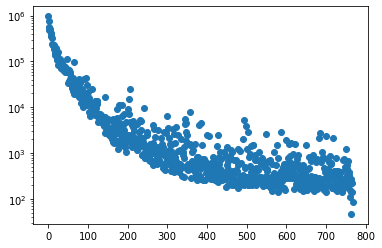

Least solved: 763
Most solved: 1


In [13]:
# Problem 4
def project_euler():
    base_url ="https://projecteuler.net/problem="

    solved = []
    for i in range(1, 769):
        response = requests.get(base_url + str(i))
        soup = BeautifulSoup(response.text, "html.parser")
        for i in soup.find_all(class_="tooltiptext_right"):
            s = i.text
            selected = re.findall(r'Solved by \d+', s)
            for s in selected:
                for s_str in re.findall(r'\d+', s):
                    solved.append(float(s_str))
    
    plt.scatter(np.arange(768), solved)
    plt.yscale('log')
    plt.show()
    print(f"Least solved: {np.argmin(solved) + 1}")
    print(f"Most solved: {np.argmax(solved) + 1}")
project_euler()

## Problem 5

The website http://example.webscraping.com contains a list of countries of the world.
Using Selenium, go to the search page, enter the letters "ca", and hit enter or click the search button.
Remember to use the crawl delay time you found in Problem Problem 1 so you don't send your requests too fast.
Gather the href links associated with the < a > tags of all 10 displayed results.
Print each link on a different line.

In [50]:
# Problem 5

# http://example.python-scraping.com/


def problem_5():
    browser = webdriver.Chrome(ChromeDriverManager().install())
    try:
        browser.get("http://example.python-scraping.com/")
        try:
            search_button = browser.find_element_by_partial_link_text("Search")
            search_button.click()
            try: 
                time.sleep(5)
                search_bar = browser.find_element_by_css_selector("input")
                search_bar.send_keys('ca')
                search_bar.send_keys(Keys.RETURN)
                try:
                    time.sleep(5)
                    results = browser.find_element_by_id("results")
                    # print(results.get_attribute('innerHTML'))\
                    links = []
                    for r in results.find_elements_by_css_selector("a"):
                        links.append(r.get_attribute('href'))
                    return links
                              
                except NoSuchElementException:
                    print("No results")
                    
            except NoSuchElementException:
                print("No search bar found")
                
        except NoSuchElementException:
            print("No search button found")

            
        
    finally:
        browser.quit()
for link in problem_5():
    print(link)
           



====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [C:\Users\bergm\.wdm\drivers\chromedriver\win32\97.0.4692.71\chromedriver.exe] found in cache


http://example.python-scraping.com/places/default/view/American-Samoa-5
http://example.python-scraping.com/places/default/view/Antarctica-9
http://example.python-scraping.com/places/default/view/Cambodia-39
http://example.python-scraping.com/places/default/view/Cameroon-40
http://example.python-scraping.com/places/default/view/Canada-41
http://example.python-scraping.com/places/default/view/Cape-Verde-42
http://example.python-scraping.com/places/default/view/Cayman-Islands-43
http://example.python-scraping.com/places/default/view/Central-African-Republic-44
http://example.python-scraping.com/places/default/view/Costa-Rica-52
http://example.python-scraping.com/places/default/view/Curacao-55
